In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score,roc_curve,auc
from sklearn.pipeline import  make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('../data/현대자동차.xlsx')
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기,가격분류
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동,일반
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동,고가
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동,일반
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동,일반
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동,일반
...,...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동,고가
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동,일반
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동,고가
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동,고가


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [5]:
ohe=OrdinalEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        # (이름, 변환기, 대상 컬럼 리스트)
        ('c1',ohe , ['종류']),
        ('c2',ohe,['연료']),
        ('c3',ohe,['변속기']),
        ('c4',ohe,['가격분류'])
    ],
    remainder='passthrough' # '그대로_유지' 컬럼은 변환 없이 그대로 통과
)

In [6]:
ar=preprocessor.fit_transform(df)

In [25]:
df_new = pd.DataFrame(ar)
pd.get_dummies(df_new)


,0,1,2,3,4,5,6,7,8,9,10,11
0,2.0,1.0,1.0,1.0,1885.0,2015.0,11.8,172.0,21.0,0.0,1999.0,1300.0
1,2.0,1.0,1.0,0.0,2190.0,2015.0,12.3,204.0,27.0,0.0,1591.0,1300.0
2,1.0,1.0,0.0,1.0,1135.0,2015.0,15.0,100.0,13.6,0.0,1368.0,1035.0
3,1.0,1.0,1.0,1.0,1645.0,2014.0,14.0,140.0,17.0,0.0,1591.0,1090.0
4,0.0,2.0,1.0,1.0,1960.0,2015.0,9.6,175.0,46.0,0.0,2497.0,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66,3.0,1.0,1.0,0.0,3802.0,2015.0,8.5,290.0,34.8,0.0,3342.0,1901.0
67,1.0,1.0,1.0,1.0,1270.0,2012.0,13.3,108.0,13.9,0.0,1396.0,1040.0
68,2.0,2.0,1.0,0.0,2430.0,2015.0,12.8,186.0,41.0,0.0,1995.0,1665.0
69,3.0,1.0,1.0,0.0,2870.0,2015.0,17.7,156.0,19.3,1.0,1999.0,1585.0


1. 상관관계를 구하시요

In [8]:
df_new.corr()

,c1__종류,c2__연료,c3__변속기,c4__가격분류,remainder__가격,remainder__년식,remainder__연비,remainder__마력,remainder__토크,remainder__하이브리드,remainder__배기량,remainder__중량
c1__종류,1.000000,0.162424,0.131061,-0.318449,-0.089810,0.112301,0.433735,-0.112631,-0.006475,0.078437,-0.369618,-0.239630
c2__연료,0.162424,1.000000,-0.049369,-0.307746,0.042345,0.341628,0.181752,0.075848,0.615162,-0.237018,0.042525,0.341404
c3__변속기,0.131061,-0.049369,1.000000,-0.420880,0.326464,0.181793,-0.182552,0.303948,0.131063,0.131533,0.215127,0.125033
c4__가격분류,-0.318449,-0.307746,-0.420880,1.000000,-0.588956,-0.448308,0.103280,-0.606549,-0.532648,-0.195736,-0.435205,-0.473263
remainder__가격,-0.089810,0.042345,0.326464,-0.588956,1.000000,0.378237,-0.345488,0.893995,0.565016,0.043974,0.852247,0.517288
remainder__년식,0.112301,0.341628,0.181793,-0.448308,0.378237,1.000000,-0.354930,0.485245,0.538361,-0.079089,0.451284,0.569321
remainder__연비,0.433735,0.181752,-0.182552,0.103280,-0.345488,-0.354930,1.000000,-0.499384,-0.260482,0.237268,-0.659503,-0.698694
remainder__마력,-0.112631,0.075848,0.303948,-0.606549,0.893995,0.485245,-0.499384,1.000000,0.662249,-0.112834,0.909100,0.618218
remainder__토크,-0.006475,0.615162,0.131063,-0.532648,0.565016,0.538361,-0.260482,0.662249,1.000000,-0.191790,0.616431,0.743632
remainder__하이브리드,0.078437,-0.237018,0.131533,-0.195736,0.043974,-0.079089,0.237268,-0.112834,-0.191790,1.000000,-0.052107,-0.034522


2. train, test 분할

In [9]:
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    stratify=y
)

In [10]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [11]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

3. 라벨: 가격분류 특성데이터: 가격분류제외 나머지

In [12]:
ohe=OrdinalEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        # (이름, 변환기, 대상 컬럼 리스트)
        ('c1',ohe , [2]),
        ('c2',ohe,[6]),
        ('c3',ohe,[10]),
    ],
    remainder='passthrough' # '그대로_유지' 컬럼은 변환 없이 그대로 통과
)

model=Pipeline([
    ('ct',preprocessor),
    ('scale',StandardScaler()),
    ('logic',LogisticRegression())
,])

In [13]:
model.fit(x_train,y_train)

,steps,"[('ct', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('c1', ...), ('c2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


4. 3065	2015	중형	13.8	200	44.5	디젤	0	2199	1799	자동 : 가격분류 예측하시요

In [14]:
model.predict([[3065,2015,'중형',13.8,200,44.5,'디젤',0,2199,1799,'자동']])

array([0])

5. train, test  : confusion matrix, 정확도, 정밀도, 재현율, f1 score , roc 를 구하시요


In [15]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
c_train = confusion_matrix(y_train, pred_train)
c_test=confusion_matrix(y_test, pred_test)

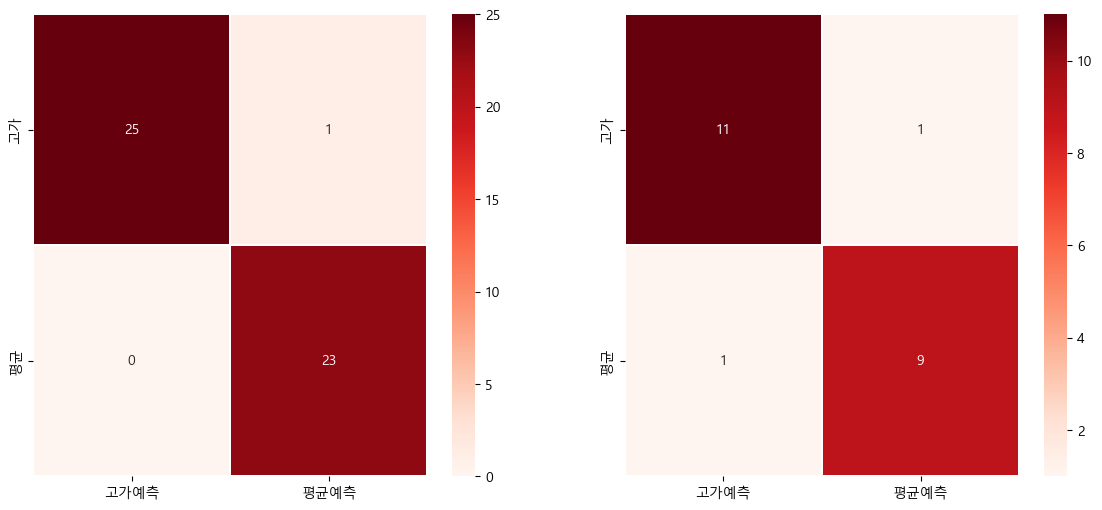

In [16]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.heatmap( c_train, annot=True, fmt='d',linewidths=0.2, cmap='Reds',xticklabels=['고가예측','평균예측'],yticklabels=['고가','평균'])
plt.subplot(1, 2, 2)
sb.heatmap( c_test, annot=True, fmt='d',linewidths=0.2, cmap='Reds',xticklabels=['고가예측','평균예측'],yticklabels=['고가','평균'])

plt.show()

In [17]:
print('train 정확도', accuracy_score(y_train, pred_train) )
print('train 정밀도', precision_score(y_train, pred_train) )
print('train 재현율', recall_score(y_train, pred_train) )
print('train f1 score', f1_score(y_train, pred_train) )

train 정확도 0.9795918367346939
train 정밀도 0.9583333333333334
train 재현율 1.0
train f1 score 0.9787234042553191


In [21]:
print('test 정확도', accuracy_score(y_test, pred_test) )
print('test 정밀도', precision_score(y_test, pred_test) )
print('test 재현율', recall_score(y_test, pred_test) )
print('test f1 score', f1_score(y_test, pred_test) )

test 정확도 0.9090909090909091
test 정밀도 0.9
test 재현율 0.9
test f1 score 0.9


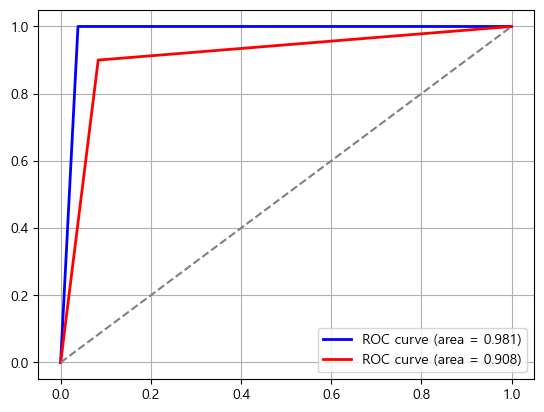

In [19]:
fpr, tpr, thresholds = roc_curve(y_train, pred_train)
auc_val = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_val:.3f})')

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc_val = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {auc_val:.3f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # 대각선
plt.legend(loc="lower right")
plt.grid(True)
plt.show()